In [37]:
# importing packages we'll need
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data set
df = pd.read_csv('loan.csv', dtype = {'issue_d': str}, low_memory=False)
# https://www.kaggle.com/wendykan/lending-club-loan-data

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(df)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Columns: 145 entries, id to settlement_term
dtypes: float64(71), int64(38), object(36)
memory usage: 1.1+ GB


In [6]:
df.nunique()

id                                                 0
member_id                                          0
loan_amnt                                       1561
funded_amnt                                     1561
funded_amnt_inv                                 1580
term                                               2
int_rate                                         255
installment                                    69186
grade                                              7
sub_grade                                         35
emp_title                                     233592
emp_length                                        11
home_ownership                                     4
annual_inc                                     52275
verification_status                                3
issue_d                                           27
loan_status                                        7
pymnt_plan                                         2
url                                           

In [7]:
df.isnull().sum()*100/df.isnull().count()

id                                            100.000000
member_id                                     100.000000
loan_amnt                                       0.000000
funded_amnt                                     0.000000
funded_amnt_inv                                 0.000000
term                                            0.000000
int_rate                                        0.000000
installment                                     0.000000
grade                                           0.000000
sub_grade                                       0.000000
emp_title                                       8.625420
emp_length                                      7.387645
home_ownership                                  0.000000
annual_inc                                      0.000000
verification_status                             0.000000
issue_d                                         0.000000
loan_status                                     0.000000
pymnt_plan                     

In [8]:
df['dti'].corr(df['int_rate'])

0.13085444536568852

In [9]:
df_num = df.select_dtypes(exclude=['object'])
df_num.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,13.56,84.92,55000.0,NaN,18.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,18.94,777.23,90000.0,NaN,26.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,17.97,180.69,59280.0,NaN,10.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,18.94,146.51,92000.0,NaN,16.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,16.14,731.78,57250.0,NaN,26.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
col_names = list(df_num)

In [11]:
for i in col_names:
    print("{} and interest rate correlation is {}".format(i, df_num[i].corr(df_num['int_rate'])))

id and interest rate correlation is nan
member_id and interest rate correlation is nan
loan_amnt and interest rate correlation is 0.06697226362378149
funded_amnt and interest rate correlation is 0.06697357995593946
funded_amnt_inv and interest rate correlation is 0.06694671610251973
int_rate and interest rate correlation is 0.9999999999999998
installment and interest rate correlation is 0.10159058867491691
annual_inc and interest rate correlation is -0.07336469442038507
url and interest rate correlation is nan
dti and interest rate correlation is 0.13085444536568852
delinq_2yrs and interest rate correlation is 0.062226268767203115
inq_last_6mths and interest rate correlation is 0.16274004714640447
mths_since_last_delinq and interest rate correlation is -0.051079784413263
mths_since_last_record and interest rate correlation is -0.018507672738113087
open_acc and interest rate correlation is -0.012564465436055211
pub_rec and interest rate correlation is 0.051749037607456215
revol_bal and 

In [12]:
corr_list = []
for i in col_names:
    corr_list.append(df_num[i].corr(df_num['int_rate']))

In [13]:
corr_list

[nan,
 nan,
 0.06697226362378149,
 0.06697357995593946,
 0.06694671610251973,
 0.9999999999999998,
 0.10159058867491691,
 -0.07336469442038507,
 nan,
 0.13085444536568852,
 0.062226268767203115,
 0.16274004714640447,
 -0.051079784413263,
 -0.018507672738113087,
 -0.012564465436055211,
 0.051749037607456215,
 -0.03632037315922344,
 0.24721626880370057,
 -0.045075764758149776,
 0.03750869061825761,
 0.03753501130796804,
 0.045871802246142075,
 0.045835297437169194,
 -0.061247265895484536,
 0.37301948801313434,
 0.06071676375108787,
 0.12325733918878794,
 0.12140202120415987,
 0.056979123360535774,
 0.020831733940865783,
 -0.03995534939376981,
 nan,
 -0.12014916443561832,
 0.2262957387843996,
 0.009393894892056021,
 0.005355187912079909,
 -0.08175852410202644,
 0.13614438284940675,
 0.04071508214085312,
 0.16258681050002674,
 0.15490519773738004,
 -0.09549040817731055,
 0.04141974234424632,
 0.14370710489644667,
 0.11334552003092069,
 0.11801192885989092,
 -0.06633084071401478,
 0.2942122

In [14]:
new_df = pd.DataFrame()

In [15]:
new_df['term'] = col_names
new_df['corr'] = corr_list
new_df.head()

,term,corr
0,id,NaN
1,member_id,NaN
2,loan_amnt,0.066972
3,funded_amnt,0.066974
4,funded_amnt_inv,0.066947


In [16]:
new_df.sort_values(by=['corr'], ascending=False)

,term,corr
5,int_rate,1.000000
100,hardship_amount,0.636597
103,orig_projected_additional_accrued_interest,0.627249
24,total_rec_int,0.373019
106,settlement_amount,0.337066
104,hardship_payoff_balance_amount,0.294277
47,all_util,0.294212
55,bc_util,0.265513
93,sec_app_revol_util,0.261570
82,percent_bc_gt_75,0.260068


In [17]:
df_obj = df.select_dtypes(include=['object'])
list(df_obj)

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date']

In [18]:
manual_feat_list = ['int_rate', 'all_util', 'percent_bc_gt_75', 'dti_joint', 'num_tl_op_past_12m', 'inq_last_6mths', 'open_il_12m', 'bc_open_to_buy', 'total_bc_limit', 'mo_sin_old_rev_tl_op', 'sec_app_mort_acc', 'annual_inc_joint', 'pub_rec_bankruptcies', 'term', 'sub_grade', 'home_ownership']

In [19]:
bulk_feat_list = ['int_rate', 'all_util', 'bc_util', 'percent_bc_gt_75', 'revol_util', 'dti_joint', 'num_tl_op_past_12m', 'inq_last_6mths', 'inq_last_12m', 'open_il_12m', 'open_il_24m', 'il_util', 'open_acc_6m', 'inq_fi', 'dti', 'open_rv_24m', 'open_rv_12m', 'sec_app_inq_last_6mths', 'bc_open_to_buy', 'total_bc_limit', 'total_rev_hi_lim', 'mo_sin_old_rev_tl_op', 'sec_app_mort_acc', 'mths_since_recent_inq', 'tot_hi_cred_lim', 'annual_inc_joint', 'mort_acc', 'mo_sin_rcnt_tl', 'mths_since_rcnt_il', 'num_bc_tl', 'pct_tl_nvr_dlq', 'mo_sin_rcnt_rev_tl_op', 'tot_cur_bal', 'avg_cur_bal', 'sec_app_num_rev_accts', 'annual_inc', 'num_rev_accts', 'num_bc_sats', 'max_bal_bc', 'pub_rec_bankruptcies', 'term', 'sub_grade', 'home_ownership', 'emp_length', 'purpose', 'earliest_cr_line', 'mths_since_recent_bc', 'sec_app_mths_since_last_major_derog']

In [20]:
man_df = pd.DataFrame()
man_df = df.filter(items=manual_feat_list)
man_df.head()

,int_rate,all_util,percent_bc_gt_75,dti_joint,num_tl_op_past_12m,inq_last_6mths,open_il_12m,bc_open_to_buy,total_bc_limit,mo_sin_old_rev_tl_op,sec_app_mort_acc,annual_inc_joint,pub_rec_bankruptcies,term,sub_grade,home_ownership
0,13.56,28.0,0.0,NaN,3,1.0,1.0,34360.0,36500,212,NaN,NaN,1,36 months,C1,RENT
1,18.94,57.0,0.0,NaN,6,0.0,2.0,13761.0,15000,378,NaN,NaN,1,60 months,D2,MORTGAGE
2,17.97,35.0,0.0,NaN,0,0.0,0.0,13800.0,13800,92,NaN,NaN,0,36 months,D1,MORTGAGE
3,18.94,70.0,100.0,NaN,3,0.0,3.0,1239.0,5000,154,NaN,NaN,0,36 months,D2,MORTGAGE
4,16.14,54.0,0.0,NaN,5,0.0,3.0,8471.0,9300,216,NaN,NaN,0,60 months,C4,MORTGAGE


In [21]:
bulk_df = pd.DataFrame()
bulk_df = df.filter(items=bulk_feat_list)
bulk_df.head()

,int_rate,all_util,bc_util,percent_bc_gt_75,revol_util,dti_joint,num_tl_op_past_12m,inq_last_6mths,inq_last_12m,open_il_12m,...,max_bal_bc,pub_rec_bankruptcies,term,sub_grade,home_ownership,emp_length,purpose,earliest_cr_line,mths_since_recent_bc,sec_app_mths_since_last_major_derog
0,13.56,28.0,5.9,0.0,10.3,NaN,3,1.0,2.0,1.0,...,2137.0,1,36 months,C1,RENT,10+ years,debt_consolidation,Apr-01,1.0,NaN
1,18.94,57.0,8.3,0.0,24.2,NaN,6,0.0,2.0,2.0,...,998.0,1,60 months,D2,MORTGAGE,10+ years,debt_consolidation,Jun-87,4.0,NaN
2,17.97,35.0,0.0,0.0,19.1,NaN,0,0.0,0.0,0.0,...,0.0,0,36 months,D1,MORTGAGE,6 years,debt_consolidation,Apr-11,77.0,NaN
3,18.94,70.0,75.2,100.0,78.1,NaN,3,0.0,3.0,3.0,...,3761.0,0,36 months,D2,MORTGAGE,10+ years,debt_consolidation,Feb-06,64.0,NaN
4,16.14,54.0,8.9,0.0,3.6,NaN,5,0.0,0.0,3.0,...,516.0,0,60 months,C4,MORTGAGE,10+ years,debt_consolidation,Dec-00,2.0,NaN


In [22]:
bulk_df.isnull().sum()*100/bulk_df.isnull().count()

int_rate                                0.000000
all_util                                9.323797
bc_util                                 1.225950
percent_bc_gt_75                        1.193620
revol_util                              0.085926
dti_joint                              92.534535
num_tl_op_past_12m                      0.000000
inq_last_6mths                          0.000095
inq_last_12m                            9.309396
open_il_12m                             9.309301
open_il_24m                             9.309301
il_util                                22.749160
open_acc_6m                             9.309396
inq_fi                                  9.309301
dti                                     0.114155
open_rv_24m                             9.309301
open_rv_12m                             9.309301
sec_app_inq_last_6mths                 93.421071
bc_open_to_buy                          1.180078
total_bc_limit                          0.000000
total_rev_hi_lim    

In [23]:
man_df = pd.concat([man_df, pd.get_dummies(man_df['term'], drop_first=True)], axis=1)

In [24]:
man_df.head()

,int_rate,all_util,percent_bc_gt_75,dti_joint,num_tl_op_past_12m,inq_last_6mths,open_il_12m,bc_open_to_buy,total_bc_limit,mo_sin_old_rev_tl_op,sec_app_mort_acc,annual_inc_joint,pub_rec_bankruptcies,term,sub_grade,home_ownership,60 months
0,13.56,28.0,0.0,NaN,3,1.0,1.0,34360.0,36500,212,NaN,NaN,1,36 months,C1,RENT,0
1,18.94,57.0,0.0,NaN,6,0.0,2.0,13761.0,15000,378,NaN,NaN,1,60 months,D2,MORTGAGE,1
2,17.97,35.0,0.0,NaN,0,0.0,0.0,13800.0,13800,92,NaN,NaN,0,36 months,D1,MORTGAGE,0
3,18.94,70.0,100.0,NaN,3,0.0,3.0,1239.0,5000,154,NaN,NaN,0,36 months,D2,MORTGAGE,0
4,16.14,54.0,0.0,NaN,5,0.0,3.0,8471.0,9300,216,NaN,NaN,0,60 months,C4,MORTGAGE,1


In [25]:
man_df = pd.concat([man_df, pd.get_dummies(man_df['home_ownership'], drop_first=True)], axis=1)

In [26]:
man_df = pd.concat([man_df, pd.get_dummies(man_df['sub_grade'], drop_first=True)], axis=1)

In [27]:
man_df.head()

,int_rate,all_util,percent_bc_gt_75,dti_joint,num_tl_op_past_12m,inq_last_6mths,open_il_12m,bc_open_to_buy,total_bc_limit,mo_sin_old_rev_tl_op,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,13.56,28.0,0.0,NaN,3,1.0,1.0,34360.0,36500,212,...,0,0,0,0,0,0,0,0,0,0
1,18.94,57.0,0.0,NaN,6,0.0,2.0,13761.0,15000,378,...,0,0,0,0,0,0,0,0,0,0
2,17.97,35.0,0.0,NaN,0,0.0,0.0,13800.0,13800,92,...,0,0,0,0,0,0,0,0,0,0
3,18.94,70.0,100.0,NaN,3,0.0,3.0,1239.0,5000,154,...,0,0,0,0,0,0,0,0,0,0
4,16.14,54.0,0.0,NaN,5,0.0,3.0,8471.0,9300,216,...,0,0,0,0,0,0,0,0,0,0


In [28]:
man_df = man_df.drop('sub_grade', 1)
man_df = man_df.drop('home_ownership', 1)
man_df = man_df.drop('term', 1)

In [29]:
man_df.head()

,int_rate,all_util,percent_bc_gt_75,dti_joint,num_tl_op_past_12m,inq_last_6mths,open_il_12m,bc_open_to_buy,total_bc_limit,mo_sin_old_rev_tl_op,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,13.56,28.0,0.0,NaN,3,1.0,1.0,34360.0,36500,212,...,0,0,0,0,0,0,0,0,0,0
1,18.94,57.0,0.0,NaN,6,0.0,2.0,13761.0,15000,378,...,0,0,0,0,0,0,0,0,0,0
2,17.97,35.0,0.0,NaN,0,0.0,0.0,13800.0,13800,92,...,0,0,0,0,0,0,0,0,0,0
3,18.94,70.0,100.0,NaN,3,0.0,3.0,1239.0,5000,154,...,0,0,0,0,0,0,0,0,0,0
4,16.14,54.0,0.0,NaN,5,0.0,3.0,8471.0,9300,216,...,0,0,0,0,0,0,0,0,0,0


In [30]:
man_df.fillna(0, inplace=True)

In [31]:
man_df.head()

,int_rate,all_util,percent_bc_gt_75,dti_joint,num_tl_op_past_12m,inq_last_6mths,open_il_12m,bc_open_to_buy,total_bc_limit,mo_sin_old_rev_tl_op,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,13.56,28.0,0.0,0.0,3,1.0,1.0,34360.0,36500,212,...,0,0,0,0,0,0,0,0,0,0
1,18.94,57.0,0.0,0.0,6,0.0,2.0,13761.0,15000,378,...,0,0,0,0,0,0,0,0,0,0
2,17.97,35.0,0.0,0.0,0,0.0,0.0,13800.0,13800,92,...,0,0,0,0,0,0,0,0,0,0
3,18.94,70.0,100.0,0.0,3,0.0,3.0,1239.0,5000,154,...,0,0,0,0,0,0,0,0,0,0
4,16.14,54.0,0.0,0.0,5,0.0,3.0,8471.0,9300,216,...,0,0,0,0,0,0,0,0,0,0


In [32]:
bulk_df = pd.concat([bulk_df, pd.get_dummies(bulk_df['earliest_cr_line'], drop_first=True)], axis=1)
bulk_df = pd.concat([bulk_df, pd.get_dummies(bulk_df['purpose'], drop_first=True)], axis=1)
bulk_df = pd.concat([bulk_df, pd.get_dummies(bulk_df['emp_length'], drop_first=True)], axis=1)
bulk_df = pd.concat([bulk_df, pd.get_dummies(bulk_df['home_ownership'], drop_first=True)], axis=1)
bulk_df = pd.concat([bulk_df, pd.get_dummies(bulk_df['term'], drop_first=True)], axis=1)
bulk_df = pd.concat([bulk_df, pd.get_dummies(bulk_df['sub_grade'], drop_first=True)], axis=1)

In [33]:
bulk_df = bulk_df.drop('sub_grade', 1)
bulk_df = bulk_df.drop('term', 1)
bulk_df = bulk_df.drop('home_ownership', 1)
bulk_df = bulk_df.drop('emp_length', 1)
bulk_df = bulk_df.drop('purpose', 1)
bulk_df = bulk_df.drop('earliest_cr_line', 1)
bulk_df = bulk_df.drop('mths_since_recent_bc', 1)
bulk_df = bulk_df.drop('sec_app_mths_since_last_major_derog', 1)
bulk_df = bulk_df.drop('mths_since_rcnt_il', 1)
bulk_df = bulk_df.drop('mths_since_recent_inq', 1)

In [34]:
bulk_df.head()

,int_rate,all_util,bc_util,percent_bc_gt_75,revol_util,dti_joint,num_tl_op_past_12m,inq_last_6mths,inq_last_12m,open_il_12m,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,13.56,28.0,5.9,0.0,10.3,NaN,3,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,18.94,57.0,8.3,0.0,24.2,NaN,6,0.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,17.97,35.0,0.0,0.0,19.1,NaN,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,18.94,70.0,75.2,100.0,78.1,NaN,3,0.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,16.14,54.0,8.9,0.0,3.6,NaN,5,0.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
bulk_df.fillna(0, inplace=True)

## PCA- Bulk Features

In [38]:
X_pca = StandardScaler().fit_transform(bulk_df)
Xt_pca = X_pca.T
Cx = np.cov(Xt_pca)
Cx

array([[ 1.00000095e+00,  2.41398216e-01,  2.50196690e-01, ...,
         7.91885674e-02,  6.88686231e-02,  6.43194733e-02],
       [ 2.41398216e-01,  1.00000095e+00,  3.81971745e-01, ...,
         1.01274129e-02,  8.67291979e-03,  9.33288788e-03],
       [ 2.50196690e-01,  3.81971745e-01,  1.00000095e+00, ...,
         8.80265691e-03,  8.60770583e-03,  8.09577650e-03],
       ...,
       [ 7.91885674e-02,  1.01274129e-02,  8.80265691e-03, ...,
         1.00000095e+00, -4.97378322e-04, -4.54026183e-04],
       [ 6.88686231e-02,  8.67291979e-03,  8.60770583e-03, ...,
        -4.97378322e-04,  1.00000095e+00, -3.86689042e-04],
       [ 6.43194733e-02,  9.33288788e-03,  8.09577650e-03, ...,
        -4.54026183e-04, -3.86689042e-04,  1.00000095e+00]])

In [39]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

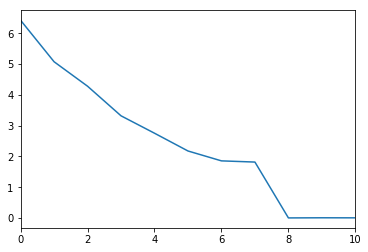

[6.42472959e+00 5.07654621e+00 4.28129552e+00 3.31903449e+00
 2.75362265e+00 2.17604976e+00 1.85492367e+00 1.81593516e+00
 9.58567470e-04 5.51103366e-03 3.54772968e-03 1.70682344e-02
 1.63746143e-02 4.22060351e-02 6.25535490e-02 8.51592306e-02
 9.00448328e-02 9.94169551e-02 1.06732618e-01 1.56622846e+00
 1.52238855e-01 1.58766323e-01 1.66334604e-01 1.90026555e-01
 2.12466774e-01 2.36321355e-01 2.63938455e-01 2.72397985e-01
 2.82273711e-01 3.21254543e-01 3.40394438e-01 3.85098558e-01
 4.02068503e-01 4.21256669e-01 4.68561425e-01 5.19920429e-01
 5.50348392e-01 1.33224898e+00 6.79377615e-01 6.82199665e-01
 7.08706184e-01 7.24321653e-01 1.22356628e+00 1.21144588e+00
 1.20084065e+00 8.15462195e-01 8.40044768e-01 1.13662568e+00
 8.67019381e-01 1.11586923e+00 1.10176937e+00 1.09249399e+00
 1.08986252e+00 1.08354795e+00 1.08024301e+00 1.07622376e+00
 1.07570863e+00 1.07598169e+00 1.07158729e+00 1.07137319e+00
 9.36550111e-01 9.37960013e-01 1.06934503e+00 1.06731013e+00
 1.06634321e+00 1.064566

In [44]:
# print scree plot
plt.plot(eig_val_cov)
plt.xlim(0, 10)
plt.show()

print(eig_val_cov)

In [45]:
sklearn_pca = PCA(n_components=16)
Y_sklearn = sklearn_pca.fit_transform(X_pca)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt_pca)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.00789278 0.00623654 0.00525957 0.00407743 0.00338278 0.00267272
 0.00226828]


## OLS- Manual Features

In [35]:
# Y is the target variable
Y = man_df['int_rate']
# X is the feature set
X = man_df.iloc[:, 1:]
# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 465)

In [37]:
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 891288
The number of observations in test set is 157287


In [38]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 6.468e+05
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:36:21   Log-Likelihood:            -1.0803e+06
No. Observations:              891288   AIC:                         2.161e+06
Df Residuals:                  891237   BIC:                         2.161e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.9153 

In [39]:
X_test = sm.add_constant(X_test)

# We fit an OLS model using statsmodels
results = sm.OLS(y_test, X_test).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.141e+05
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:36:23   Log-Likelihood:            -1.9012e+05
No. Observations:              157287   AIC:                         3.804e+05
Df Residuals:                  157236   BIC:                         3.809e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8655 

## Ridge Regression- Manual Features

In [40]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [41]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print('The regularization gap is: {}'.format(ridge_cv.score(X_train, y_train) -ridge_cv.score(X_test, y_test)))

Best alpha value is: 0.001
R-squared of the model in training set is: 0.973179359636984
-----Test set statistics-----
R-squared of the model in test set is: 0.9731609380819822
Mean absolute error of the prediction is: 0.5686614037724771
Mean squared error of the prediction is: 0.6573995294652771
Root mean squared error of the prediction is: 0.8108017818587211
Mean absolute percentage error of the prediction is: 4.406685812311066
The regularization gap is: 1.842155500175746e-05


## Lasso Regression- Manual Features

In [42]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print('The regularization gap is: {}'.format(lasso_cv.score(X_train, y_train) - lasso_cv.score(X_test, y_test)))

Best alpha value is: 1e-08
R-squared of the model in training set is: 0.9731791271015281
-----Test set statistics-----
R-squared of the model in test set is: 0.9731609192937625
Mean absolute error of the prediction is: 0.5686693150092454
Mean squared error of the prediction is: 0.6573999896664147
Root mean squared error of the prediction is: 0.8108020656525331
Mean absolute percentage error of the prediction is: 4.406674563657048
The regularization gap is: 1.8207807765624473e-05


## ElasticNet Regression- Manual Features

In [43]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print('The regularization gap is: {}'.format(elasticnet_cv.score(X_train, y_train) - elasticnet_cv.score(X_test, y_test)))

Best alpha value is: 1e-08
R-squared of the model in training set is: 0.9731791271476845
-----Test set statistics-----
R-squared of the model in test set is: 0.9731609203217968
Mean absolute error of the prediction is: 0.5686695240627828
Mean squared error of the prediction is: 0.6573999644856067
Root mean squared error of the prediction is: 0.8108020501242006
Mean absolute percentage error of the prediction is: 4.406680295728165
The regularization gap is: 1.8206825887712164e-05


## SVR & Decision Forest Regression

I also attempted to perform a Support Vector Regression and a Decision Forest Regression on the manual features, but after approximately 20 minutes of runtime on each model with no results I decided to abandon those options and conclude that the size of this data set and the number of features in the data set preclude these models from being a best choice. 